ANALISIS REGRESI LOGISTIK MULTINOMIAL UNTUK MENGETAHUI FAKTOR YANG MEMPENGARUHI MAHASISWA DALAM MEMILIH APLIKASI BELANJA ONLINE  

- NINO AHMADIY – 24083010049 

- MUHAMMAD RAFLY WAHYUDI – 24083010078 

- DANI SHOFI NUR IZZA – 24083010124 

- y = Aplikasi Belanja Online yang Sering Digunakan.
- x1 = JENIS KELAMIN
- x2 = Berapa rata-rata frekuensi Anda untuk berbelanja di aplikasi online shop setiap bulan?
- x3 = Berapa rata-rata pengeluaran Anda untuk berbelanja di aplikasi online shop  setiap bulan?
- x4 = Jenis barang yang paling sering Anda beli secara online.
- x5 = Faktor utama yang Anda perhatikan ketika memilih produk.
- x6 = Seberapa besar promo mempengaruhi keputusan Anda belanja online?  
= x7 = PRODUK
- x8 = PRICE & PRMOTION
- x9 = OGISTICS & AFTER-SALES
- x10 = USER EXPERIENCE
- x11 = trust

In [33]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelBinarizer, LabelEncoder
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis, f_oneway, chi2_contingency
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
import statsmodels.api as sm
from scipy import stats
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score, classification_report, roc_curve,auc, roc_auc_score
from sklearn.preprocessing import OrdinalEncoder
from statsmodels.discrete.discrete_model import MNLogit

In [34]:
dnew = pd.read_csv('REGLOG_BR.csv')

In [35]:
dnew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133 entries, 0 to 132
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Y       133 non-null    int64
 1   X1      133 non-null    int64
 2   X2      133 non-null    int64
 3   X3      133 non-null    int64
 4   X4      133 non-null    int64
 5   X5      133 non-null    int64
 6   X6      133 non-null    int64
 7   X7      133 non-null    int64
 8   X8      133 non-null    int64
 9   X9      133 non-null    int64
 10  X10     133 non-null    int64
 11  X11     133 non-null    int64
dtypes: int64(12)
memory usage: 12.6 KB


In [36]:
dnew.head()

,Y,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11
0,2,0,1,4,0,4,1,3,3,3,2,1
1,0,1,2,1,0,1,4,3,3,3,2,1
2,0,1,2,2,0,2,4,3,3,3,2,1
3,0,0,1,2,0,1,4,3,3,3,2,1
4,0,0,2,0,3,1,3,3,2,3,2,1


In [37]:
dnew.isnull().sum()

Y      0
X1     0
X2     0
X3     0
X4     0
X5     0
X6     0
X7     0
X8     0
X9     0
X10    0
X11    0
dtype: int64

# Prepocessing Data

OnehotEncoder untuk Var X 

In [38]:
dnew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133 entries, 0 to 132
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Y       133 non-null    int64
 1   X1      133 non-null    int64
 2   X2      133 non-null    int64
 3   X3      133 non-null    int64
 4   X4      133 non-null    int64
 5   X5      133 non-null    int64
 6   X6      133 non-null    int64
 7   X7      133 non-null    int64
 8   X8      133 non-null    int64
 9   X9      133 non-null    int64
 10  X10     133 non-null    int64
 11  X11     133 non-null    int64
dtypes: int64(12)
memory usage: 12.6 KB


In [39]:
y = dnew['Y']
le = LabelEncoder()
y = le.fit_transform(y)

In [40]:
X = dnew.drop(columns=['Y'])
categorical_features = X.columns.tolist()

In [41]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Korelasi

In [42]:
df = dnew.copy()

cat_cols = df.columns.tolist()
encoder = OrdinalEncoder()
df_encoded = df.copy()
df_encoded[cat_cols] = encoder.fit_transform(df[cat_cols])


=== Matriks Korelasi Spearman ===
            Y        X1        X2        X3        X4        X5        X6  \
Y    1.000000  0.045541  0.096700  0.093472 -0.066481  0.076246 -0.049353   
X1   0.045541  1.000000  0.214049  0.052434 -0.053733 -0.193099  0.031282   
X2   0.096700  0.214049  1.000000 -0.132491 -0.123373 -0.030202 -0.029799   
X3   0.093472  0.052434 -0.132491  1.000000 -0.024686  0.088944  0.093868   
X4  -0.066481 -0.053733 -0.123373 -0.024686  1.000000 -0.042157 -0.127869   
X5   0.076246 -0.193099 -0.030202  0.088944 -0.042157  1.000000 -0.067445   
X6  -0.049353  0.031282 -0.029799  0.093868 -0.127869 -0.067445  1.000000   
X7  -0.131366 -0.183779 -0.102950 -0.004449 -0.005612  0.152523  0.139039   
X8   0.152369 -0.048780 -0.081356  0.060020 -0.147513 -0.021584  0.187132   
X9   0.109880  0.006564 -0.035929  0.054438 -0.054269  0.006352  0.067334   
X10 -0.002936  0.046992 -0.052569  0.096028 -0.098164 -0.052602 -0.106305   
X11 -0.054528 -0.146303 -0.131757 -0.1047

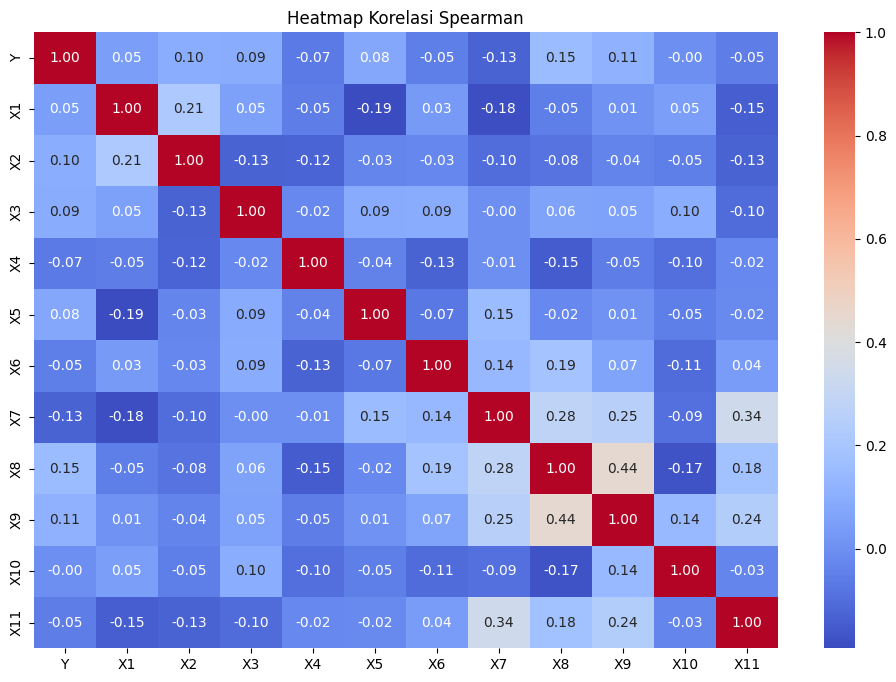

In [43]:
spearman_corr = df_encoded.corr(method="spearman")

print("\n=== Matriks Korelasi Spearman ===")
print(spearman_corr)
plt.figure(figsize=(12,8))
sns.heatmap(spearman_corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Heatmap Korelasi Spearman")
plt.show()

In [44]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

In [45]:
vif_data = pd.DataFrame()
vif_data["Variabel"] = X_scaled_df.columns
vif_data["VIF"] = [variance_inflation_factor(X_scaled_df.values, i)
                   for i in range(X_scaled_df.shape[1])]

print(vif_data)

   Variabel       VIF
0        X1  1.153204
1        X2  1.107656
2        X3  1.082976
3        X4  1.088724
4        X5  1.112434
5        X6  1.227336
6        X7  1.405574
7        X8  1.629704
8        X9  1.467532
9       X10  1.196082
10      X11  1.309709


# Model Regresi Logistik Multinomial

In [46]:
df['Y'].value_counts()

Y
0    106
2     15
1      9
3      3
Name: count, dtype: int64

In [47]:
X_new = X_scaled_df.drop(columns=['X10','X5'])

In [48]:
X_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133 entries, 0 to 132
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      133 non-null    float64
 1   X2      133 non-null    float64
 2   X3      133 non-null    float64
 3   X4      133 non-null    float64
 4   X6      133 non-null    float64
 5   X7      133 non-null    float64
 6   X8      133 non-null    float64
 7   X9      133 non-null    float64
 8   X11     133 non-null    float64
dtypes: float64(9)
memory usage: 9.5 KB


In [49]:
df['Y'] = df['Y'].astype('category')
dnew_y0 = df['Y'].cat.reorder_categories([0,1,2,3], ordered=True)

In [50]:
X_final = sm.add_constant(X_new)
model1 = MNLogit(dnew_y0, X_final)
result1 = model1.fit_regularized(alpha=0.1)
print(result1.summary())

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.5579951185398968
            Iterations: 154
            Function evaluations: 154
            Gradient evaluations: 154
                          MNLogit Regression Results                          
Dep. Variable:                      Y   No. Observations:                  133
Model:                        MNLogit   Df Residuals:                      104
Method:                           MLE   Df Model:                           26
Date:                Sat, 29 Nov 2025   Pseudo R-squ.:                  0.2249
Time:                        22:57:18   Log-Likelihood:                -71.617
converged:                       True   LL-Null:                       -92.400
Covariance Type:            nonrobust   LLR p-value:                   0.02719
       Y=1       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------

In [51]:
result1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      Y   No. Observations:                  133
Model:                        MNLogit   Df Residuals:                      104
Method:                           MLE   Df Model:                           26
Date:                Sat, 29 Nov 2025   Pseudo R-squ.:                  0.2249
Time:                        22:57:18   Log-Likelihood:                -71.617
converged:                       True   LL-Null:                       -92.400
Covariance Type:            nonrobust   LLR p-value:                   0.02719
==============================================================================
       Y=1       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.7452      1.905     -3.015      0.003      -9.480      -2.011
X1             2.0064      1.618      1.240      0.215      -1.166       5.178
X2             2.0037      1.054      1.902      0.057      -0.061       4.069
X3             0.7265      0.404      1.798      0.072      -0.065       1.518
X4             0.4527      0.434      1.042      0.297      -0.399       1.304
X6            -0.7558      0.498     -1.518      0.129      -1.732       0.220
X7            -0.9378      0.489     -1.919      0.055      -1.895       0.020
X8             0.8788      0.564      1.559      0.119      -0.226       1.984
X9             1.1429      0.881      1.297      0.194      -0.584       2.869
X11            0.7604      1.215      0.626      0.531      -1.620       3.141
------------------------------------------------------------------------------
       Y=2       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.2161      0.353     -6.279      0.000      -2.908      -1.524
X1            -0.2981      0.311     -0.960      0.337      -0.907       0.311
X2             0.2032      0.306      0.665      0.506      -0.396       0.802
X3             0.2251      0.299      0.754      0.451      -0.360       0.810
X4            -0.1829      0.305     -0.600      0.548      -0.780       0.414
X6            -0.2042      0.336     -0.608      0.543      -0.862       0.454
X7            -0.0867      0.407     -0.213      0.831      -0.884       0.711
X8             0.8279      0.487      1.699      0.089      -0.127       1.783
X9             0.0515      0.372      0.138      0.890      -0.678       0.781
X11           -0.3320      0.264     -1.260      0.208      -0.848       0.184
------------------------------------------------------------------------------
       Y=3       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.8119      0.743     -5.131      0.000      -5.268      -2.356
X1            -0.3830      0.623     -0.615      0.539      -1.604       0.838
X2             0.0207      0.608      0.034      0.973      -1.171       1.212
X3            -0.0605      0.709     -0.085      0.932      -1.449       1.328
X4            -0.2668      0.646     -0.413      0.680      -1.534       1.000
X6             0.5158      0.848      0.608      0.543      -1.147       2.178
X7            -0.3590      0.666     -0.539      0.590      -1.664       0.946
X8                  0        nan        nan        nan         nan         nan
X9            -0.1905      0.569     -0.335      0.738      -1.305       0.924
X11            0.3193      1.216      0.263      0.793      -2.065       2.703
==============================================================================
"""

In [52]:
print("AIC:", result1.aic)
print("BIC:", result1.bic)

AIC: 201.2335923413787
BIC: 285.05371705980957


“Nilai AIC sebesar 203.236 dan nilai BIC sebesar 289.946 menunjukkan bahwa model memiliki kecocokan yang cukup baik. Nilai ini juga dapat digunakan sebagai dasar pembanding apabila peneliti menguji model alternatif. Semakin kecil nilai AIC dan BIC, maka model dianggap lebih baik karena memiliki keseimbangan yang optimal antara kesesuaian model dan jumlah parameter.”

# Odds Ratio Model 1

In [53]:
odds_ratio = np.exp(result1.params)
print(odds_ratio)

              0         1         2
const  0.003198  0.109032  0.022107
X1     7.436495  0.742222  0.681837
X2     7.416448  1.225332  1.020942
X3     2.067859  1.252455  0.941295
X4     1.572579  0.832814  0.765821
X6     0.469621  0.815263  1.675022
X7     0.391496  0.916908  0.698407
X8     2.408065  2.288441  1.000000
X9     3.135731  1.052831  0.826557
X11    2.139107  0.717466  1.376146


# Model Regresi Logistik Multinomial dengan Variabel independen Dummy

In [54]:
dnew_dummy = pd.get_dummies(df, columns=["X1"], prefix="X1").astype(int)

In [55]:
dnew_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133 entries, 0 to 132
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Y       133 non-null    int32
 1   X2      133 non-null    int32
 2   X3      133 non-null    int32
 3   X4      133 non-null    int32
 4   X5      133 non-null    int32
 5   X6      133 non-null    int32
 6   X7      133 non-null    int32
 7   X8      133 non-null    int32
 8   X9      133 non-null    int32
 9   X10     133 non-null    int32
 10  X11     133 non-null    int32
 11  X1_0    133 non-null    int32
 12  X1_1    133 non-null    int32
dtypes: int32(13)
memory usage: 6.9 KB


In [56]:
X_baru = dnew_dummy.drop(columns=['Y','X10','X11'])
Y_baru = dnew_dummy['Y']

In [57]:
scaler = StandardScaler()
X_scaled_new = scaler.fit_transform(X_baru)

In [58]:
Y_baru.info()

<class 'pandas.core.series.Series'>
RangeIndex: 133 entries, 0 to 132
Series name: Y
Non-Null Count  Dtype
--------------  -----
133 non-null    int32
dtypes: int32(1)
memory usage: 664.0 bytes


In [59]:
X_baru.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133 entries, 0 to 132
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   X2      133 non-null    int32
 1   X3      133 non-null    int32
 2   X4      133 non-null    int32
 3   X5      133 non-null    int32
 4   X6      133 non-null    int32
 5   X7      133 non-null    int32
 6   X8      133 non-null    int32
 7   X9      133 non-null    int32
 8   X1_0    133 non-null    int32
 9   X1_1    133 non-null    int32
dtypes: int32(10)
memory usage: 5.3 KB


In [60]:
X_baru['X1_1'].isnull().sum()

0

In [61]:
X_final1 = sm.add_constant(X_baru)
model2 = MNLogit(dnew_y0, X_final1)
result2 = model2.fit_regularized(alpha=0.1, weight='balanced')
print(result2.summary())

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.5679243022010082
            Iterations: 278
            Function evaluations: 279
            Gradient evaluations: 278
                          MNLogit Regression Results                          
Dep. Variable:                      Y   No. Observations:                  133
Model:                        MNLogit   Df Residuals:                      104
Method:                           MLE   Df Model:                           26
Date:                Sat, 29 Nov 2025   Pseudo R-squ.:                  0.2139
Time:                        22:57:18   Log-Likelihood:                -72.635
converged:                       True   LL-Null:                       -92.400
Covariance Type:            nonrobust   LLR p-value:                   0.04334
       Y=1       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------

In [62]:
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      Y   No. Observations:                  133
Model:                        MNLogit   Df Residuals:                      104
Method:                           MLE   Df Model:                           26
Date:                Sat, 29 Nov 2025   Pseudo R-squ.:                  0.2139
Time:                        22:57:18   Log-Likelihood:                -72.635
converged:                       True   LL-Null:                       -92.400
Covariance Type:            nonrobust   LLR p-value:                   0.04334
==============================================================================
       Y=1       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -6.6047      3.492     -1.891      0.059     -13.450       0.240
X2             1.8598      1.172      1.587      0.113      -0.438       4.157
X3             0.4842      0.352      1.377      0.168      -0.205       1.173
X4             0.2007      0.244      0.823      0.411      -0.277       0.679
X5             0.1734      0.400      0.433      0.665      -0.611       0.958
X6            -0.8568      0.520     -1.649      0.099      -1.875       0.162
X7            -1.2988      0.783     -1.658      0.097      -2.834       0.237
X8             1.0717      0.768      1.395      0.163      -0.434       2.577
X9             1.3655      0.978      1.396      0.163      -0.551       3.282
X1_0          -4.1809      3.226     -1.296      0.195     -10.504       2.142
X1_1                0        nan        nan        nan         nan         nan
------------------------------------------------------------------------------
       Y=2       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.3976      2.192     -1.094      0.274      -6.694       1.899
X2             0.2454      0.372      0.659      0.510      -0.484       0.975
X3             0.2088      0.281      0.743      0.457      -0.342       0.759
X4            -0.1322      0.178     -0.740      0.459      -0.482       0.218
X5             0.1027      0.243      0.422      0.673      -0.374       0.580
X6            -0.2180      0.347     -0.629      0.530      -0.898       0.462
X7            -0.6286      0.648     -0.970      0.332      -1.899       0.642
X8             1.0365      0.617      1.680      0.093      -0.173       2.246
X9            -0.0240      0.354     -0.068      0.946      -0.717       0.669
X1_0                0        nan        nan        nan         nan         nan
X1_1          -0.4792      0.615     -0.779      0.436      -1.684       0.726
------------------------------------------------------------------------------
       Y=3       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.1025      3.651     -0.576      0.565      -9.259       5.054
X2            -0.0005      0.773     -0.001      0.999      -1.515       1.514
X3            -0.2260      0.691     -0.327      0.744      -1.581       1.129
X4            -0.2506      0.396     -0.632      0.527      -1.027       0.526
X5             0.4595      0.461      0.996      0.319      -0.445       1.364
X6             0.4361      0.762      0.573      0.567      -1.057       1.929
X7            -0.7806      1.001     -0.780      0.435      -2.742       1.181
X8                  0        nan        nan        nan         nan         nan
X9            -0.2452      0.581     -0.422      0.673      -1.384       0.893
X1_0                0        nan        nan        nan         nan         nan
X1

In [63]:
print("AIC:", result2.aic)
print("BIC:", result2.bic)

AIC: 203.26942610668954
BIC: 287.0895508251204


# Odds Ratio Model 2

In [64]:
odds_ratio = np.exp(result2.params)
print(odds_ratio)

              0         1         2
const  0.001354  0.090933  0.122156
X2     6.422258  1.278178  0.999483
X3     1.622909  1.232154  0.797740
X4     1.222200  0.876206  0.778343
X5     1.189386  1.108120  1.583267
X6     0.424503  0.804144  1.546631
X7     0.272872  0.533354  0.458139
X8     2.920311  2.819384  1.000000
X9     3.917560  0.976306  0.782530
X1_0   0.015284  1.000000  1.000000
X1_1   1.000000  0.619294  0.397723
